In [29]:
import os
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score , accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pickle

import warnings
warnings.filterwarnings("ignore")

from utils import *

Predictions | Ground Truth
(array([0., 1.]), array([6447, 7762], dtype=int64))
(array([0., 1.]), array([7104, 7105], dtype=int64))
Bin Accuracy:  0.746146808360898
Bin F1:  0.7573821214770969
Bin AUC:  0.8221333512435729
Bin Recall:  0.7923997185080929
Bin Recall:  0.7253285235763979
[[4972 2132]
 [1475 5630]]
                    param_n_estimators  mean_test_score  mean_fit_time
param_n_estimators                                                    
120                                  5         0.757437       0.519795
180                                  3         0.757383       0.656347
100                                  4         0.756987       0.406245
140                                  6         0.756882       0.513911
60                                   1         0.756499       0.306240
20                                   1         0.756348       0.068418
                 param_max_depth  mean_test_score  mean_fit_time
param_max_depth                                        

(<Figure size 640x480 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'param_n_estimators'}>,
        <AxesSubplot: title={'center': 'param_max_depth'}>,
        <AxesSubplot: title={'center': 'param_min_samples_split'}>],
       dtype=object))

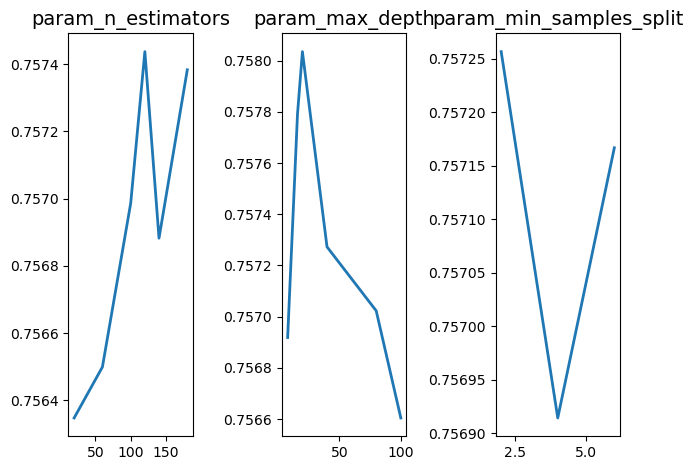

In [35]:
## dataset = "data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
# score = 'f1'
# folder = "results/dataset_5050"

# X,y = preprocess(dataset, target_col = 'Diabetes_binary')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state= 42)
# X_test, X_val,  y_test, y_val  = train_test_split(X_test, y_test, test_size = 0.33, stratify = y_test, random_state = 42)
# ##### Check that we like the split ###############
# # print(len(X_train), len(X_test), len(X_val))
# # print(len(X_test) / len(X))
# # input()

# grid = { "n_estimators" : [20, 60, 100, 120 , 140 , 180], 
#          "max_depth"    : [8, 16, 20, 40, 60, 80, 100],
#          "min_samples_split" : [2,4,6],  
#          "min_samples_leaf" : [1,2]
# }
# rf = RandomForestClassifier()

# ######## Choose to Do Randomized Search for bigger grid / faster search ###################
# # search = RandomizedSearchCV(estimator = rf,
# #                                     param_distributions = grid,
# #                                     n_iter = 50, 
# #                                     cv = 5, verbose = 3, 
# #                                     scoring = score,
# #                                     random_state = 42 , n_jobs = -1)

# ############# Choose Full Grid Search ###########################

# print("searching")
# search = GridSearchCV(rf, param_grid = grid, scoring = score, cv=KFold(n_splits=5) )
# search.fit(X_val, y_val)
# best_clf = search.best_estimator_
# print("done")


# ######## Fit on the entire training set #################
# best_clf.fit(X_train, y_train)


# ###### Evaluate the model ############################
y_pred = best_clf.predict(X_test)
print("Predictions | Ground Truth")
print(np.unique(y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))
print("Bin Accuracy: " , sklearn.metrics.accuracy_score(y_test,y_pred))
print("Bin F1: ", f1_score(y_test, y_pred) )
print("Bin AUC: ", sklearn.metrics.roc_auc_score(y_test, best_clf.predict_proba(X_test)[:,1]))
print("Bin Recall: ", sklearn.metrics.recall_score(y_test, y_pred))
print("Bin Precision: ", sklearn.metrics.precision_score(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))


########## Feature Importances and Saving ############################
importances = pd.DataFrame( zip(X_val.columns, list(best_clf.feature_importances_) ) , 
                                       columns = ["feature", "rf_importance"]).sort_values( "rf_importance", ascending = False )
importances.head(20)
importances.to_csv('{}/feature-importances.csv'.format(folder))
pd.DataFrame(search.cv_results_).to_csv('{}/grid_search_data.csv'.format(folder))

name = '{}/best_model.pkl'.format(folder)
with open(name, 'wb') as f:
    pickle.dump(best_clf, f)
    
    
####### Out of Interest, Let's Be More Aggressive on Grid Search Here ##############
grid_analysis(pd.DataFrame(search.cv_results_))

In [21]:
def preprocess(fname ='diabetes_012_health_indicators_BRFSS2015.csv', target_col='Diabetes_012'):
    data = pd.read_csv(fname)
    data.rename(columns = {target_col:'target'}, inplace = True)
    y = data["target"]
    X = data.drop(['target'], axis = 1)
    print(y.value_counts())
    standard , minmax , enc =  StandardScaler() , MinMaxScaler(), OneHotEncoder()
    
    continuous = ["BMI", "PhysHlth",  "MentHlth"] # continuous
    ordinal = ['Income', "Education", "Age"] # ordinal with range
    one_hot = ['GenHlth'] # ordinal, categorical 
    binary = [] #"everything else"

    for col in list(X.columns):
        if col in ordinal:
            X[col] = minmax.fit_transform(np.array(X[col]).reshape(len(X),1))
        if col in continuous:
            X[col] = standard.fit_transform(np.array(X[col]).reshape(len(X),1))
        if col in one_hot:
            one_hot = pd.get_dummies(X[col])
            names = [col+"_" +str(list(one_hot)[i]) for i in range(len(list(one_hot)))]
            one_hot.columns = names
            X = pd.concat([X, one_hot], axis = 1)
        else:
            binary.append(col)
    return X,y

### yep^








### no below

In [ ]:
## Random Old Plot

In [ ]:
import matplotlib.cm as cm
import matplotlib
fig,axs = plt.subplots(3,2, figsize = (15,15))
cv["standardized_mean_score"] = standard.fit_transform(np.array(cv["mean_test_score"]*10).reshape(len(cv),1))
cv["minmax_mean_score"] = minmax.fit_transform(np.array(cv["mean_test_score"]*10).reshape(len(cv),1))
minima, maxima = np.min(cv["standardized_mean_score"]), np.max(cv["standardized_mean_score"])
# print(minima, maxima)
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
# mapper = cm.ScalarMappable(norm= norm, cmap=cm.Reds)
# # for v in sorted(list(cv["standardized_mean_score"])):
# #     print("%.4f: %.4f" % (v, mapper.to_rgba(v)[0]) )
# cmap = mapper.to_rgba(cv["mean_score"])[0]
axs[0,0].scatter(cv["param_n_estimators"], cv["param_min_samples_split"], 
            s = 3*np.exp(cv["standardized_mean_score"]*4), 
            cmap = "YlOrRd", #"YlGnBu"
            c = list(cv["standardized_mean_score"]))
axs[0,0].set_title("n estimators v. min sample split")
axs[0,0].patch.set_facecolor("lightgrey")
axs[0,0].patch.set_alpha(.2)

axs[0,1].scatter(cv["param_n_estimators"], cv["param_max_depth"], 
            s = 4*np.exp(cv["standardized_mean_score"]*4), 
            cmap = "Spectral", #"YlGnBu", YlOrRd"
            c = list(cv["standardized_mean_score"]))
axs[0,1].set_title("n estimators v. max depth")
axs[0,1].patch.set_facecolor("lightgrey")
axs[0,1].patch.set_alpha(.2)

axs[1,1].scatter(cv["param_min_samples_split"], cv["param_max_depth"], 
            s = 4*np.exp(cv["standardized_mean_score"]*4), 
            cmap = "Spectral", #"YlGnBu", YlOrRd"
            c = list(cv["standardized_mean_score"]))
axs[1,1].set_title("min splt v. max depth")
axs[1,1].patch.set_facecolor("lightgrey")
axs[1,1].patch.set_alpha(.2)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3,2, figsize = (15,15))
axs[0,0].scatter(cv["param_max_features"], cv["mean_test_score"],color = "firebrick")
axs[0,0].set_title("Max Features Tuning")
axs[0,1].scatter(cv["param_n_estimators"], cv["mean_test_score"] , color = "firebrick")
axs[0,1].set_title("N Estimators")
axs[1,0].scatter(cv["param_max_depth"], cv["mean_test_score"], color ="green")
axs[1,0].set_title("Max Depth")
axs[1,1].scatter(cv["param_min_samples_split"], cv["mean_test_score"], color ="green")
axs[1,0].set_title("Max Depth")
axs[2,1].scatter(cv["param_bootstrap"], cv["mean_test_score"], color ="blue")
axs[2,0].scatter(cv["param_criterion"], cv["mean_test_score"], color ="blue")
plt.show()